In [3]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
print(sys.path[-1])  # só pra confirmar o caminho

from src.data_processing import load_data, preprocess_data
from src.pca_analysis import apply_pca
from src.model_random_forest import(
    RFConfig, evaluate_rf_no_pca, evaluate_rf_with_pca
)

# 1 - Dados
X_train, X_test, y_train, y_test = load_data()
X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)

# 2 - PCA (k=7; você pode testar 5...10)
X_train_pca, X_test_pca, pca = apply_pca(X_train_scaled, X_test_scaled, n_components=7, plot_variance=False)

c:\Users\vanma\OneDrive\Documentos\UPE\Projeto\reconhecimento-padroes


In [4]:
cfg = RFConfig(
    n_estimators=300,
    max_depth=None,          # depois testamos limitar
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

metrics_no_pca  = evaluate_rf_no_pca(X_train_scaled, X_test_scaled, y_train, y_test, cfg)

metrics_with_pca = evaluate_rf_with_pca(X_train_pca, X_test_pca, y_train, y_test, cfg)

metrics_no_pca, metrics_with_pca


({'accuracy': 0.9473684210526315,
  'precision': 0.9583333333333334,
  'recall': 0.9583333333333334,
  'f1': 0.9583333333333334,
  'confusion_matrix': [[39, 3], [3, 69]],
  'settings': 'no_pca'},
 {'accuracy': 0.9210526315789473,
  'precision': 0.9436619718309859,
  'recall': 0.9305555555555556,
  'f1': 0.9370629370629371,
  'confusion_matrix': [[38, 4], [5, 67]],
  'settings': 'with_pca',
  'pca_n_components': 7})

In [7]:
import pandas as pd

df_compare = pd.DataFrame([metrics_no_pca, metrics_with_pca])
df_compare = df_compare[["accuracy", "precision", "recall", "f1", "pca_n_components"]]
df_compare


,accuracy,precision,recall,f1,pca_n_components
0,0.947368,0.958333,0.958333,0.958333,NaN
1,0.921053,0.943662,0.930556,0.937063,7.0


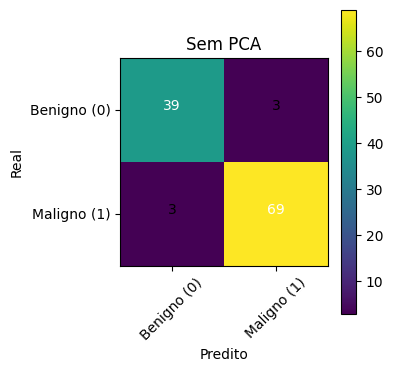

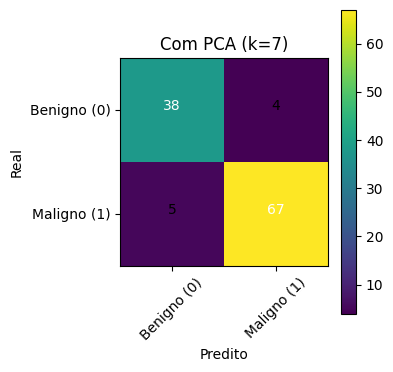

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion(cm, labels=("Benigno (0)", "Maligno (1)"), title="Matriz de Confusão"):
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Real')
    plt.xlabel('Predito')
    plt.tight_layout()

plot_confusion(np.array(metrics_no_pca["confusion_matrix"]), title="Sem PCA")
plot_confusion(np.array(metrics_with_pca["confusion_matrix"]), title="Com PCA (k=7)")
plt.show()
